In [1]:
#import sys
#!conda install -c conda-forge xgboost 

#This is a really cool way to install modules right from Jupyter"""
#!pip install xgboost
#!pip3 install dask --upgrade

/bin/sh: pip3: command not found


In [2]:
import pandas as pd
test_data=pd.read_csv('./test.csv')
train_data =pd.read_csv('./train.csv')

# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
import site; site.getsitepackages()

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,13,48,50,55,90,125,144,162,163,164,166,168,169,170,171,172,174,176,241,243,245,247,251,254,273,289,291,292,293,295,296,312,313,314,331,343,365,373,375,396,413,439,490,619,623,630,633,638,642,644,669,712,759,768,788,809,828,928,953,978,1000,1001,1002,1003,1004,1023,1036,1040,1042,1063,1085,1098,1099,1120,1128,1135,1151,1152,1165,1167,1181,1192,1204,1205,1206,1207,1215,1225,1227,1229,1231,1233) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,49,51,56,91,126,145,163,165,166,167,168,169,171,173,174,176,177,242,244,246,248,252,255,274,290,291,292,294,295,296,332,344,366,374,376,397,414,440,491,620,634,639,642,643,645,710,713,760,769,810,829,929,954,979,1001,1002,1003,1004,1005,1024,1037,1041,1043,

['/anaconda2/lib/python2.7/site-packages', '/anaconda2/lib/site-python']

In [3]:
from sklearn import decomposition

In [19]:
cols_to_remove = []

for col in train_data.columns:
    try:
        _ = train_data[col].astype(float)
    except ValueError:
        cols_to_remove.append(col)
        pass

# keep only the columns in df that do not contain string
train_data_new = train_data[[col for col in train_data.columns if col not in cols_to_remove]]
label_Y = train_data['is_female']
test_data = train_data[:2000]
test_label = label_Y[:2000]
train_label = label_Y[2000:]
train_data_new = train_data_new.drop(['is_female'], axis=1)
# # drop the column with more than 100 NAN 
cleaned_train_data = train_data_new.dropna(axis=1)
# train_data_new.shape

In [6]:
pca = decomposition.PCA(n_components=3)
Y_sklearn = pca.fit_transform(cleaned_train_data)
#test_sklearn = pca.fit_transform(cleaned_test_data)
pcaR = pca.fit(cleaned_train_data)


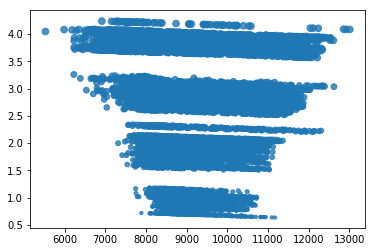

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# print(pcaR.components_)
# print(Y_sklearn.shape)
X_new = pca.inverse_transform(Y_sklearn)
plt.scatter(X_new[:,0], X_new[:,1],X_new[:,2], alpha = 0.8)

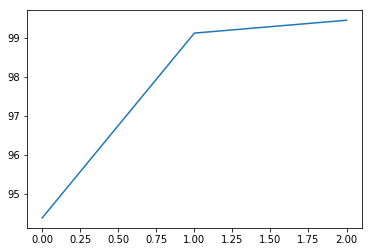

In [8]:
import numpy as np
var = pcaR.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [10]:
clf.fit(Y_sklearn, label_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [11]:
# Importing in the test.csv
from sklearn.model_selection import cross_val_score
cross_val_score(clf, Y_sklearn,label_Y, cv=5)# REALLY BAD 

array([0.56778965, 0.56778965, 0.56943303, 0.59107094, 0.57764996])

In [13]:
specific_features_2 = train_data_new.dropna(axis=1)
specific_test = specific_features_2[:2000]
specific_features_2 = specific_features_2[2000:]

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=15, max_depth=None, min_samples_split=2, random_state=0)
clf2.fit(specific_features_2, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
cross_val_score(clf2, specific_test, test_label, cv=5) #Better

array([0.81795511, 0.8475    , 0.8425    , 0.835     , 0.839599  ])

In [32]:
# these are the columns without ANY NaNs
list(specific_features_2)
# interesting features - 

['train_id',
 'AA3',
 'AA4',
 'AA7',
 'AA14',
 'AA15',
 'DG1',
 'DG3',
 'DG3A',
 'DG4',
 'DG5_1',
 'DG5_2',
 'DG5_3',
 'DG5_4',
 'DG5_5',
 'DG5_6',
 'DG5_7',
 'DG5_8',
 'DG5_9',
 'DG5_10',
 'DG5_11',
 'DG5_96',
 'DG6',
 'DG8a',
 'DG8b',
 'DG8c',
 'DL0',
 'DL1',
 'DL4_1',
 'DL4_2',
 'DL4_3',
 'DL4_4',
 'DL4_5',
 'DL4_6',
 'DL4_7',
 'DL4_8',
 'DL4_9',
 'DL4_10',
 'DL4_11',
 'DL4_12',
 'DL4_13',
 'DL4_14',
 'DL4_15',
 'DL4_16',
 'DL4_17',
 'DL4_18',
 'DL4_19',
 'DL4_20',
 'DL4_21',
 'DL4_22',
 'DL4_23',
 'DL4_96',
 'DL4_99',
 'DL6',
 'DL11',
 'DL14',
 'DL15',
 'DL16',
 'DL17',
 'DL18',
 'DL19',
 'DL20',
 'DL21',
 'DL22',
 'DL23',
 'DL24',
 'DL25_1',
 'DL25_2',
 'DL25_3',
 'DL25_4',
 'DL25_5',
 'DL25_6',
 'DL25_7',
 'DL25_8',
 'DL26_1',
 'DL26_2',
 'DL26_3',
 'DL26_4',
 'DL26_5',
 'DL26_6',
 'DL26_7',
 'DL26_8',
 'DL26_9',
 'DL26_10',
 'DL26_12',
 'DL26_99',
 'MT1',
 'MT2',
 'MT10',
 'FF1',
 'MM1',
 'MM2_1',
 'MM2_2',
 'MM2_3',
 'MM2_4',
 'MM2_5',
 'MM2_6',
 'MM2_7',
 'MM2_8',
 'MM2_9',
 '

Sharon, what I'm doing right now is from the dataframe specific_features_2 (which are the features withou NaNs in them), I'm going through the dictionary and only selecting from those which I think will have the best indication of female/male and then I'm going to pick only those columns to feed to the classifier. Also another urgent thing that needs to be done is to clean up the code (right now I named variables pretty messily also need to annotate)


array([0.53366584, 0.5225    , 0.545     , 0.54      , 0.46867168])